# AVIATION ACCIDENTS DATA ANALYSIS 

### Introduction

This project aims to analyse data from the National Transport Safety Board(NTSB) on aviation accidents from 1962 to 2023 covering civil aviation accidents and related incidents (select cases in the United States and abroad).Actionable insight from the anaylsed data is to be used by my company to purchase operational airplanes ,with the lowest risks, for both commercial and private endevours.  Data on United States, State codes is also provided for reference.

### Objectives

The objectives for this analysis are as follows:

    1. Identify the airplanes models with the highest and lowest accident frequency.

    2. Analyze historical aviation data on aviation accidents and incidents to assess risk factors.

    3. Provide data-driven recommendations on which airplane models to consider for purchase.

### Business Understanding

As our company expands into new sectors and would like to purchase aircrafts for the cause, assessing aircraft risk is crucial for informed purchases. Several factors affect or influence aviation safety, they include: 

    1.Aircraft Manufucturer - Some Manufucturers have better safety records compared to others so we can know that by comparing the make and model of different aircrafts.

    2.Aircraft accident and incident trends - identify aircrafts that have a trend of either accidents or incidents to know which ones offer a lower risk.

    3.Aircraft Damage - identify aircrafts prone to servere damage or substantial damage in occurence of accidents.

    4.Injury Severity - evaluation of fatal and non-fatal injuries and on which aircrafts each occur more frequently.

    5.Weather Conditions - evaluate how different weather conditions impact risk on different aircrafts. 

    6.Broad face of flight - determine on which face of flight do most accidents occur,either Takeoff,cruising or landing.

    7.Number of Engines - determine how the number of engines impacts risk, are more engines better that one ? ,we will get to evaluate that.

By analyzing this factors, we can get to make data-driven recommendations on which airplanes, that offer the lowest risks, to be purchased by the company.

### Data Understanding

##### 1.Loading of the dataset

In [4]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Aviation_accidents_df = pd.read_csv('./Data/AviationData.csv' , encoding= 'ISO-8859-1') # Load the dataset using pandas library
Aviation_accidents_df.info() # Display general information about the dataset now dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

c:\Users\JUDAH\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
Aviation_accidents_df.shape # To show the total number of rows and columns,respectively 

(88889, 31)

In [7]:
Aviation_accidents_df.head() # To show the first five rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


##### 2. Data exploration
Look for duplicate and missing values; if any are found, they will either be filled in or removed based on how important they are to the project.We'll eliminate duplicate values.From the data exploration we will be able to narrow down to what specific data we will use for analysis,by data, i mean columns,the columns we will use for the analysis and visualization.

In [8]:
Aviation_accidents_df.isnull().sum() # To check on the number of missing values per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [9]:
Aviation_accidents_df.duplicated() # To check for duplicated Rows
Aviation_accidents_df.duplicated().sum() # To check number of duplicated rows , if return is 0 ,there are no duplicated rows.

0

### Data Cleaning and Preparation.
In this stage, we will need to clean and prepare the data before analysis.We achieve this by:

    A.Handle missing values
    -We will check columns with missing values and decide on whether to fill or drop them.

    B.Handle duplicated values
    -Since no duplicated values were found in the data exploration stage of the data, we are good to go.

    C.Filter unnecessary columns
    -We will have to remove columns that may not be of so much help for risk assessment.

    D. Convert data types
    -If need be we will have to convert some variables to correct format i.e Converting of date column to datetime format.


##### A.Handle missing data

1.Drop columns with more than 50% missing values.
The following columns have alot of mising values and might not aid in our analysis:

###### Aircraft.Category (56,602 missing)

###### FAR.Description (56,866 missing)

###### Schedule (76,307 missing)

###### Air.carrier (72,241 missing)

###### Latitude (54507 missing)

###### Longitude (54516 missing)

So it is best that we drop them.

In [10]:
Aviation_accidents_df.drop(columns = ['Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier' , 'Latitude' ,'Longitude'] , inplace = True) # Drop the columns that will not be neeeded in the analysis and have alot of missing values

In [11]:
Aviation_accidents_df.isnull().sum() # Check for the remaining missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

2. For the country column, we can check the most frequent country appearing then fill the missing values in country with the most frequent country.Then for the missing values in the location column we can fill with 'Unknown' for now.

In [12]:
most_common_country = Aviation_accidents_df['Country'].mode()# Get most frequently occuring country in the data
most_common_country

0    United States
dtype: object

In [13]:
Aviation_accidents_df['Country'].fillna('United States', inplace= True) # Fill missing country values with the most occuring country in the data

In [14]:
Aviation_accidents_df['Location'].fillna('Unknown' , inplace = True) # Fill missing location values with 'Unknown'

In [15]:
Aviation_accidents_df.isna().sum() # Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

3. Since 'Make' and 'Model' are of key importance, we can not fill them with just any data but what we can do is drop the rows where 'Make' and 'Model' are missing values.

In [16]:
Aviation_accidents_df = Aviation_accidents_df.loc[Aviation_accidents_df['Make'].notna() & Aviation_accidents_df['Model'].notna()] # By doing this we keep only the rows where both Make and Model are not missing.


In [17]:
Aviation_accidents_df.isna().sum() # Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
Purpose.of.flight          6138
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

3. Fill missing values for aircraft information(Number of Engines and Engine type).We will replace the missing values for these Aircraft information with 'Unknown'.

In [18]:
Aviation_accidents_df['Number.of.Engines'].fillna("Unknown", inplace= True)# Fill 'Number.of.Engines' missing values with 'Unknown'
Aviation_accidents_df['Engine.Type'].fillna("Unknown", inplace= True)# Fill 'Engine.Type' missing values with 'Unknown'

In [19]:
Aviation_accidents_df.isna().sum() # Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

4. For injury Data if there is missing value we assume that they were zero injuries for the specific column.Therefore we replace the missing values with a zero(0).

In [20]:
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']# Compile injury data to a variable called injury_columns 
Aviation_accidents_df[injury_columns] = Aviation_accidents_df[injury_columns].fillna(0)# Fill missing data of injury_columns with 0(Zero)

In [21]:
Aviation_accidents_df.isna().sum() # Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

5. Remove columns for airport details(Airport.Code & Airport.Name) as they will not be needed for the analysis.

In [22]:
Aviation_accidents_df.drop(columns=['Airport.Name' , 'Airport.Code'] , inplace= True) # Drop columns

In [23]:
Aviation_accidents_df.isna().sum() # Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity             979
Aircraft.damage            3172
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

6.Check columns on 'Injury.Severity' ,if data is missing it may only indicate that it was not recorded.Thus replace missing value with 'Unknown'.

In [24]:
Aviation_accidents_df['Injury.Severity'].fillna("Unknown", inplace=True)# Replace missing values with 'Unknown'

In [25]:
Aviation_accidents_df.isna().sum()# Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage            3172
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

7. For missing data in 'Aircraft.Damage' it is assumed that data was not recorded,so rather that writing 'No damage' , we will fill missing data with 'Unknown'

In [26]:
Aviation_accidents_df['Aircraft.damage'].fillna('Unknown', inplace=True)# Fill missing values with 'Unknown'


In [27]:
Aviation_accidents_df.isna().sum()# Check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

8. Registration Number is the unique Identification of the aircraft, Some of it has missing values which could indicate that it might be a data entry issue or an unregistered aircraft,which is quite unlikely.So we shall fill the missing values with 'Unknown' for now.

In [28]:
Aviation_accidents_df['Registration.Number'].fillna('Unknown' , inplace =True)# Fill missing values with 'Unknown'

In [29]:
Aviation_accidents_df.isna().sum()# check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

9. Amature.Build column indicates whether or not an aircraft was home built/ experimental or not.For missing values in this category, we will substitute missing values with 'Unknown'.

In [30]:
Aviation_accidents_df['Amateur.Built'].fillna('Unknown', inplace=True)# Fill missing values with 'Unknown'

In [31]:
Aviation_accidents_df.isna().sum()# check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6138
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

10. Purpose.of.Flight column states the reason why the aircraft took off. We will fill the missing values with 'Unknown' because it is of importance and it is best fill it with that to avoid biasness if we fill it with a specific reason other than its original reason that we do not know.

In [32]:
Aviation_accidents_df['Purpose.of.flight'].fillna('Unknown', inplace=True)# Fill missing values with 'Unknown'

In [33]:
Aviation_accidents_df.isna().sum()# check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

11.Weather.Conditions.This column tells us if the weather was VMC (Visual) or IMC (Instrument).We shall fill the missing values in that column with 'Unknown'

In [34]:
Aviation_accidents_df['Weather.Condition'].fillna('Unknown', inplace=True)# Fill missing values with 'Unknown'

In [35]:
Aviation_accidents_df.isna().sum()# check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

12. Broad.phase.of.Flight.Describes when the accident took place, at which phase of the aircrafts journey.We shall fill missing values in this column with 'Unknown'

In [36]:
Aviation_accidents_df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)# Fill missing values with 'Unknown'

In [37]:
Aviation_accidents_df.isna().sum()# check for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6335
Publication.Date          13765
dtype: int64

13. Report.Status.Since the report status has an outcome that is recurring , I opt to fill the missing values with the mode(most frequent value) of the column.To ensure data consistency.

In [38]:
most_common_status = Aviation_accidents_df['Report.Status'].mode()# Get most frequent value
most_common_status

0    Probable Cause
dtype: object

In [39]:
Aviation_accidents_df['Report.Status'].fillna('Probable Cause' , inplace= True)# Fill missing values with the most frequent value

In [40]:
Aviation_accidents_df.isna().sum()# check for missing values|

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13765
dtype: int64

14. Publication.Date. Since we have the event date the publication date may not be of importance to out data analysis,so we can drop it.

In [41]:
Aviation_accidents_df.drop(columns=['Publication.Date'] , inplace= True)# Drop Column

In [42]:
Aviation_accidents_df.isna().sum()# check for missing values

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

##### B. Handle Duplicates.

Since no duplicated rows are present in the data, we are clear to continue with data exploration and preparation before analysis.

##### C. Filtering unnecessary Columns

Since not all columns will be important for assessing of risk factor,We can drop them as seen above in the Handling of missing values section.

##### D. Convert data types
If need be we will have to convert some variables to correct format.

In [43]:
# Convert Event.Date to Datetime Format
Aviation_accidents_df['Event.Date'] = pd.to_datetime(Aviation_accidents_df['Event.Date'], errors='coerce')# Convert to correct format

### Data Analysis

Now lets start to analyze the data to identify risk factors and trends in aviation accidents

First and foremost lets do a basic analysis to get a baseline.Lets start with the following:

1. Find the number of unique aircraft models

In [44]:
Aviation_accidents_df['Model'].nunique() # Find how many different types of aircrafts are involved in accidents 

12311

2. Find the most frequent aircraft models involved in accidents

In [45]:
Aviation_accidents_df['Model'].value_counts()# count of different aircraft models involved in accidents

152                     2367
172                     1756
172N                    1164
PA-28-140                932
150                      829
                        ... 
AT 4 LSA                   1
ARION LIGHTNING LS-1       1
47G3-B2A                   1
Mustang                    1
Allegro                    1
Name: Model, Length: 12311, dtype: int64

In [46]:
Aviation_accidents_df['Model'].value_counts().head(10)# lets narrow down to Top 10 aircraft models involved in  aviation accidents

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: Model, dtype: int64

As we can see above Model 152 has the highest number of recorded aviation accidents followed by Model 172 and so on and so forth.So lets check the models with the least recorded aviation accidents.

In [47]:
Aviation_accidents_df['Model'].value_counts().tail(100)#Lets narrow down to Bottom 10 aircraft models involved in aviation accidents

JW9L                    1
DO-24                   1
GLASSAIRE               1
PA-28R200               1
PDQ-2                   1
                       ..
AT 4 LSA                1
ARION LIGHTNING LS-1    1
47G3-B2A                1
Mustang                 1
Allegro                 1
Name: Model, Length: 100, dtype: int64

3. Find aircraft manufactures whose aircrafts have the most accidents or incidents.

In [48]:
Aviation_accidents_df['Make'].value_counts().head(10)# Top 10 aircraft manufucturers that experience the most accidents and incidents


Cessna     22226
Piper      12029
CESSNA      4919
Beech       4330
PIPER       2840
Bell        2134
Boeing      1593
BOEING      1145
Grumman     1094
Mooney      1092
Name: Make, dtype: int64

4. Check whether number of engines affect risk. We can check this by comparing number of engines to injuries delt(fatal)

In [49]:
Aviation_accidents_df.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum()

Number.of.Engines
0.0          409.0
1.0        22107.0
2.0        10518.0
3.0          878.0
4.0         1666.0
6.0            0.0
8.0            0.0
Unknown    14536.0
Name: Total.Fatal.Injuries, dtype: float64

Lets make a visualization showing how number of engine affect risk factor.

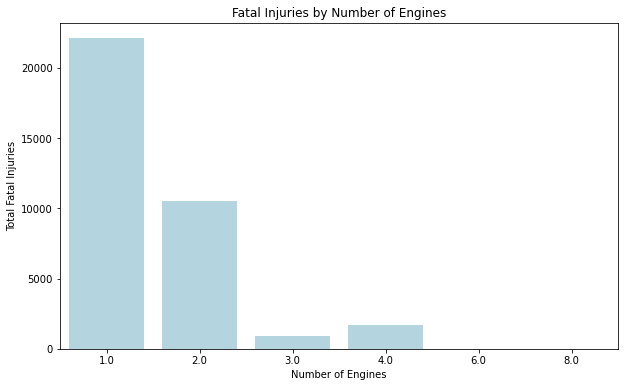

In [ ]:
filtered_df = Aviation_accidents_df[(Aviation_accidents_df['Number.of.Engines'].notna()) & Aviation_accidents_df['Number.of.Engines'] > 0]# Filters the Number.of.Engines values in that we plot only the values that are present, not missing that will be labelled as 'Unknown' nor  zero values

engine_risk = filtered_df.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum()# Group by number of engines and sum fatal injuries

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=engine_risk.index, y=engine_risk.values, color= 'lightblue' )
plt.xlabel("Number of Engines")
plt.ylabel("Total Fatal Injuries")
plt.title("Fatal Injuries by Number of Engines")
plt.show()


From the bar graph above,It is clear that  with single engines are more riskier compared to aircrafts with multiple engines.It visually noted that engines with 3 engines recorded the least number of aircraft accidents.

In [51]:
Aviation_accidents_df['Injury.Severity'].value_counts()

Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(138)        1
Fatal(229)        1
Fatal(230)        1
Fatal(78)         1
Fatal(125)        1
Name: Injury.Severity, Length: 110, dtype: int64

In [110]:
Aviation_accidents_df.groupby('Injury.Severity')['Make'].value_counts().head(20)

Injury.Severity  Make                       
Fatal            CESSNA                         959
                 PIPER                          638
                 BEECH                          329
                 BELL                           168
                 ROBINSON                       157
                 Cessna                         150
                 Piper                          106
                 MOONEY                          75
                 CIRRUS DESIGN CORP              68
                 Beech                           54
                 BOEING                          42
                 AIR TRACTOR INC                 40
                 AIR TRACTOR                     36
                 EUROCOPTER                      34
                 CIRRUS                          31
                 HUGHES                          31
                 ROBINSON HELICOPTER             31
                 SOCATA                          28
                 RO

As depicted above 'Cessna' aircraft manufucturer has recorded the most number of fatal accidents,but there is something to note,Cessna might record a large number of fatal accidents but the main reason why it is so may be because of its large fleet size and they could still be more safer compared to another aircraft manufucturer that still experiences a large number of accidents with a small fleet size.

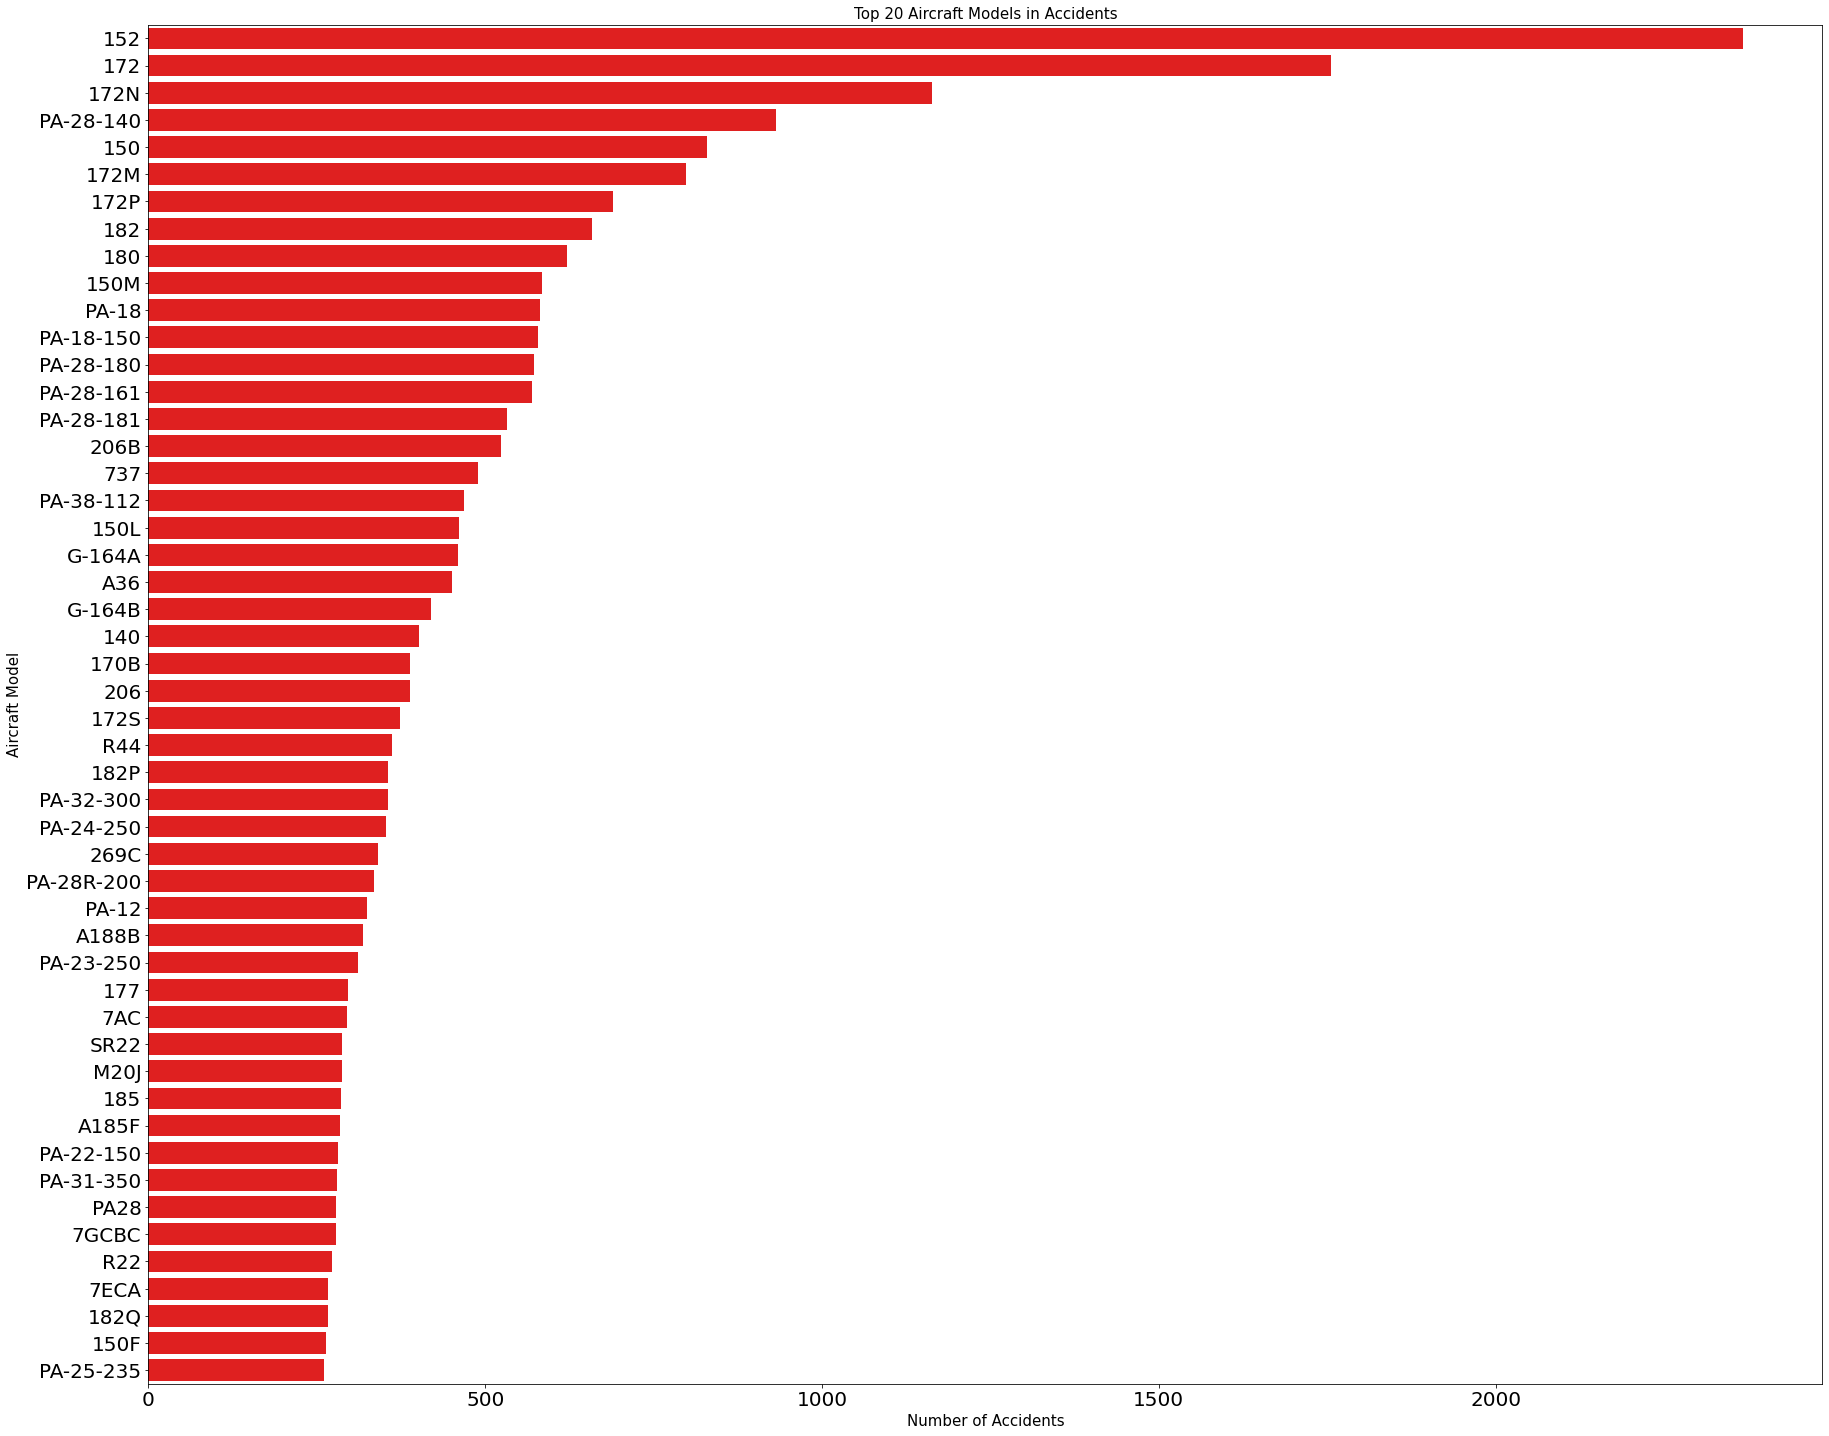

In [157]:
#Top 50 most frequent aircraft models in accidents
top_models = Aviation_accidents_df['Model'].value_counts().head(50)
# Plot bar chart
plt.figure(figsize=(30, 25))
sns.barplot(x=top_models.values, y=top_models.index, color='Red')
plt.xlabel("Number of Accidents" ,fontsize = 15)
plt.ylabel("Aircraft Model" , fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 20 Aircraft Models in Accidents" , fontsize = 15)
plt.show()


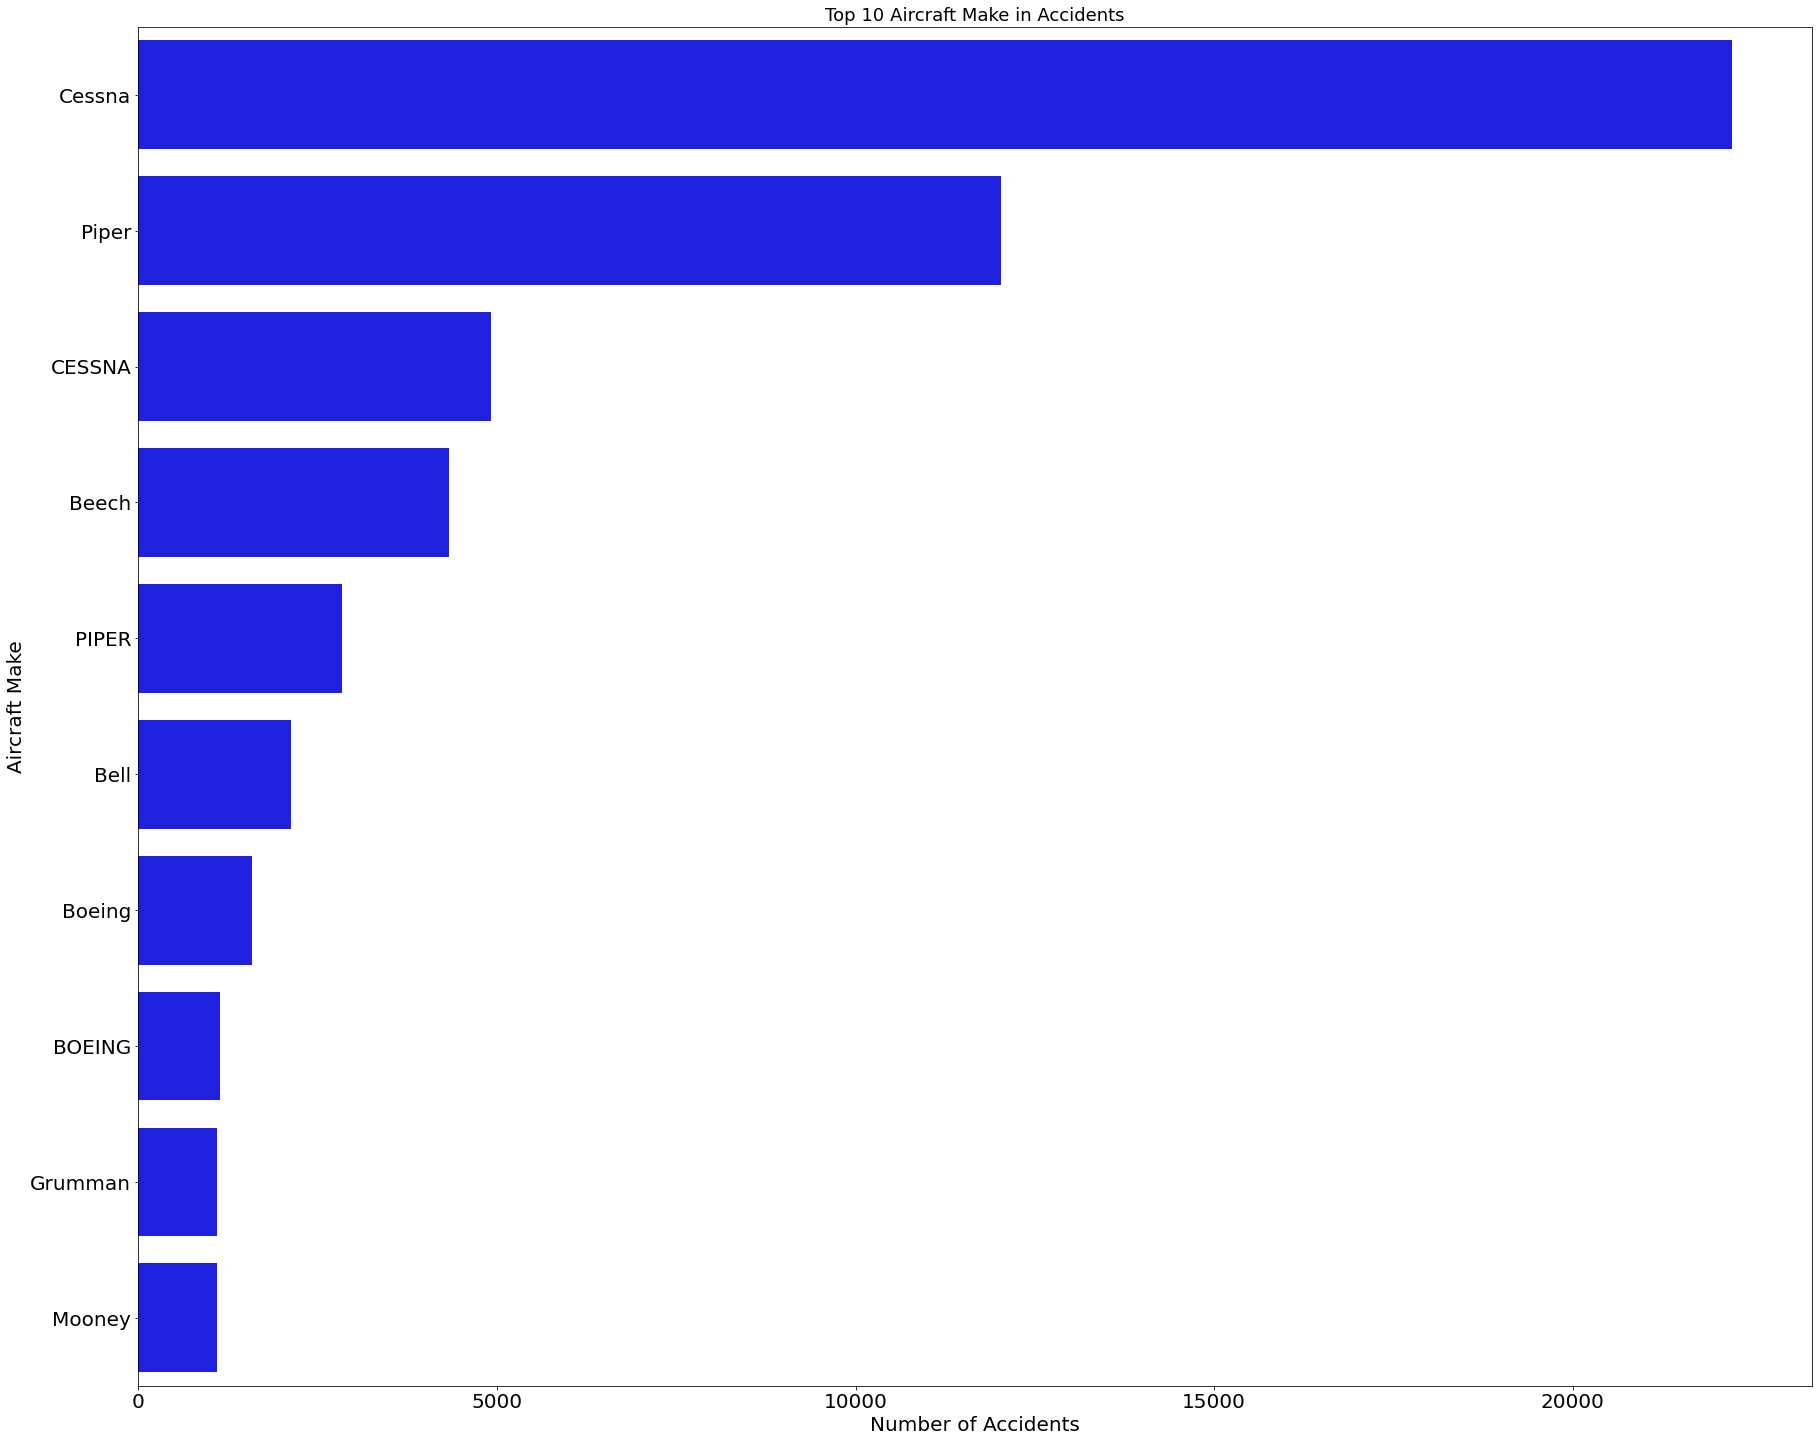

In [165]:
# Top 10 most frequent aircraft manufuctures involved  in accidents
top_make = Aviation_accidents_df['Make'].value_counts().head(10)
# Plot bar chart
plt.figure(figsize=(30, 25))
sns.barplot(x= top_make.values, y= top_make.index, color= 'Blue' )
plt.xlabel("Number of Accidents" , fontsize= 20)
plt.ylabel("Aircraft Make" , fontsize= 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title("Top 10 Aircraft Make in Accidents" , fontsize= 18)
plt.show()


Cessna hold the first position as the leading aircraft manufucturer with the most number of aircraft accidents,this could be also because they may have a greater fleet size.This is why we shall dive further down to investigate individual models of each manufucturer that have been involved in aviation accidents for a more detailed risk assessment.

In [163]:
# Count number of accidents per make and model
accidents_per_make_model = Aviation_accidents_df.groupby(['Make', 'Model']).size().reset_index(name='Number_of_accidents')

# Sort to see highest number of accidents first
accidents_by_make_model = accidents_per_make_model.sort_values(by= 'Number_of_accidents', ascending= False)

# Check top 30 makes and models with the most number of accidents
accidents_by_make_model.head(30)

,Make,Model,Number_of_accidents
5745,Cessna,152,2168
5767,Cessna,172,1254
5811,Cessna,172N,996
15079,Piper,PA-28-140,812
5720,Cessna,150,716
5809,Cessna,172M,667
5814,Cessna,172P,597
14973,Piper,PA-18,539
5744,Cessna,150M,539
15088,Piper,PA-28-161,502


As we can see above breaking  down the models by make we can see that Model '152' by Make 'Cessna' recorded the most number of accidents.This comparison of accidents by model alongside make gives a clear insight to what specific aircrafts recorded to be involved in aviation accidents and how many accidents to be precise.Which is really helpful in risk assessment.

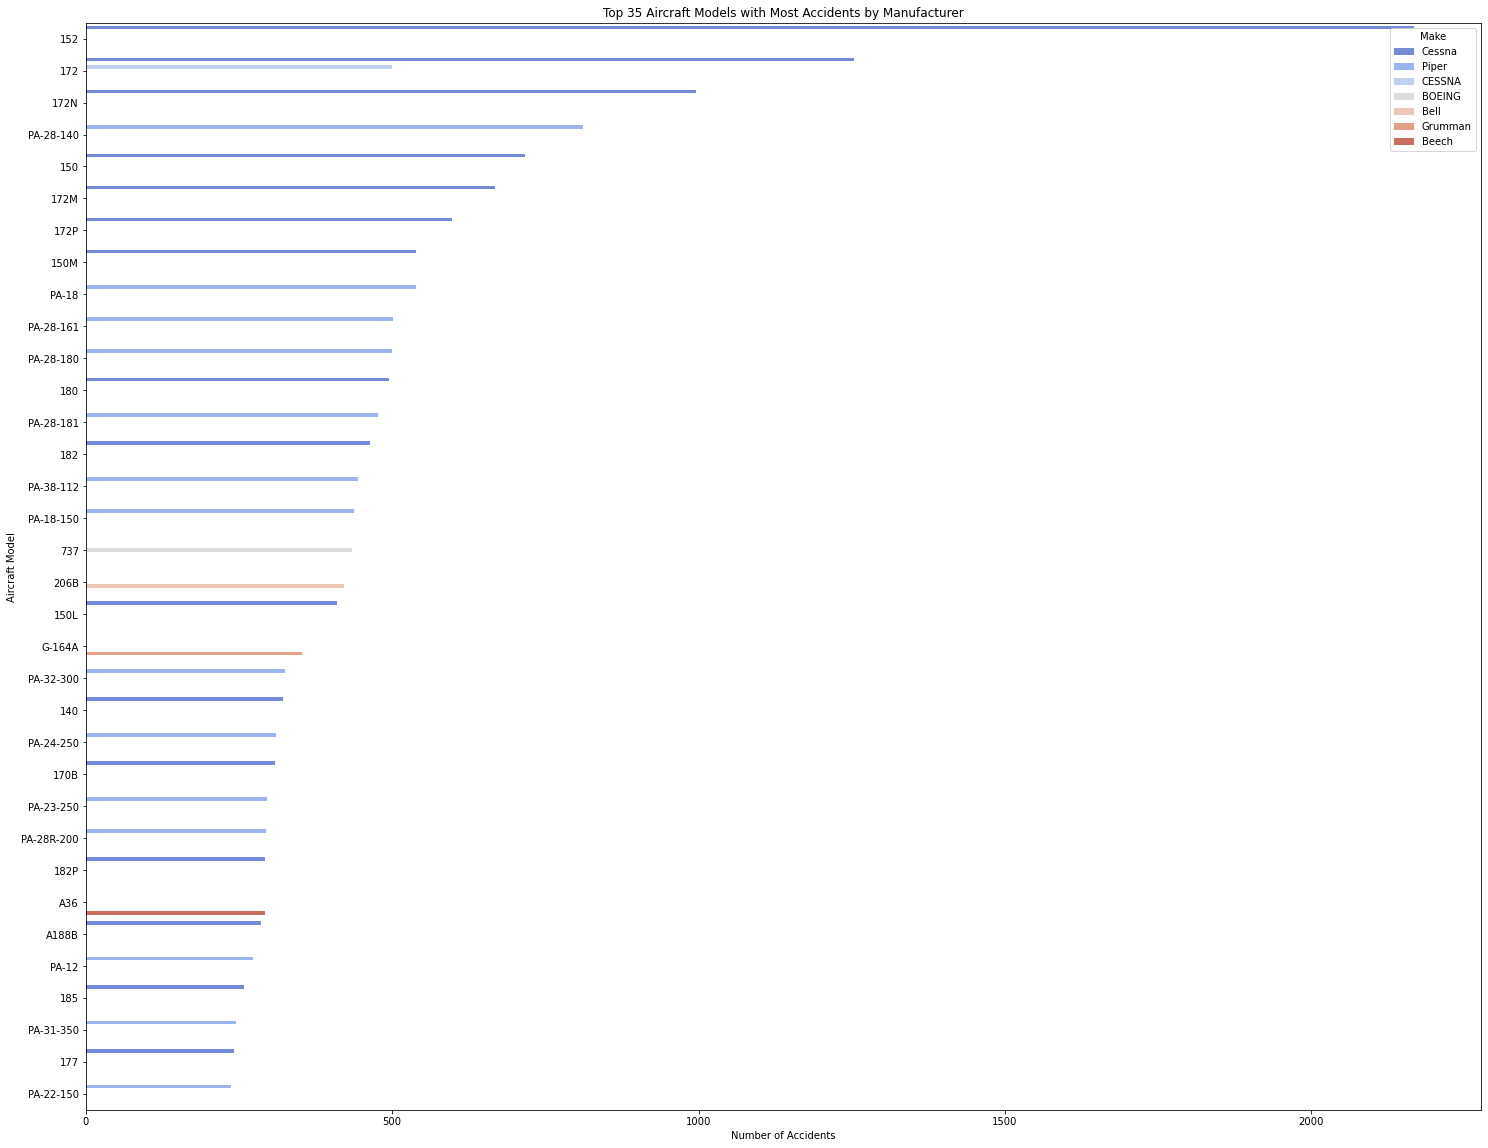

In [ ]:
plt.figure(figsize=(25, 20))# Pot a bargraph showing accidents by make and model 
sns.barplot(data=accidents_by_make_model.head(35), x="Number_of_accidents", y="Model", hue="Make", palette="coolwarm" , linewidth=2)
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.title("Top 35 Aircraft Models with Most Accidents by Manufacturer")
plt.legend(title="Make")
plt.show()


In [164]:
# Count number of accidents per make and model
accidents_per_make_model = Aviation_accidents_df.groupby(['Make', 'Model']).size().reset_index(name='Number_of_accidents')
filtered_accidents = accidents_per_make_model[accidents_per_make_model['Number_of_accidents'] > 1] #Check for aircrafts which have 50 accidents or more

# Sort to see lowest number of accidents first
accidents_by_make_model = filtered_accidents.sort_values(by= 'Number_of_accidents', ascending= False)

# Check the bottom 50 makes and models with the least number of accidents
accidents_by_make_model.tail(50)

,Make,Model,Number_of_accidents
4114,Boeing,747SP-21,2
4116,Boeing,75,2
4130,Boeing,757-24APF,2
12857,Maule,M4-220C,2
4137,Boeing,757-33N,2
12848,Maule,M-7-260,2
4138,Boeing,75A,2
4143,Boeing,767-201,2
4146,Boeing,767-223,2
4149,Boeing,767-231,2


Most of the aircrafts we see above all have only experienced a small number of accident.This could be because of low usage.The may have fewer fleets, and one thing to note is that a widely used aircraft with many accidents could still be safer than a rare aircraft with just a few incidents.

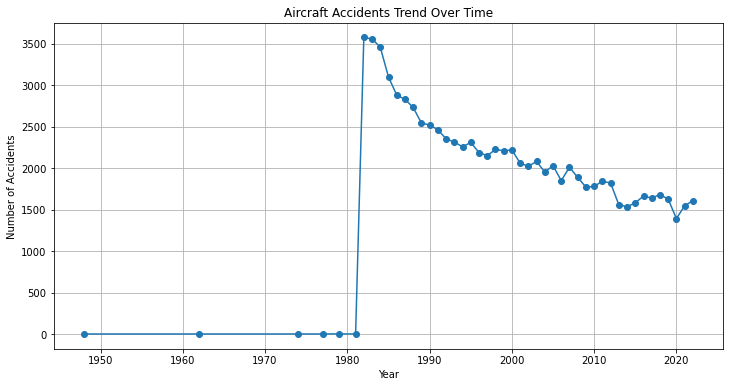

In [ ]:
Aviation_accidents_df['Year'] = Aviation_accidents_df['Event.Date'].dt.year # Extracts the year from the 'Event.Date' Column and stores the years in a new column 'Year' 
accidents_per_year = Aviation_accidents_df.groupby('Year').size()  # Count accidents per year

plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year, marker='o', linestyle='-')  # Plot a line graph of number of accidents over time(years)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Accidents Trend Over Time")
plt.grid()
plt.show()


according to the line graph above,it seems we have years prior where data was not recorded as much.Lets investigate below to be sure.

In [84]:
# Count accidents per year again
accidents_per_year = Aviation_accidents_df['Year'].value_counts().sort_index()# Counts and sorts accidents per year in ascending order
print(accidents_per_year.tail(50))  # Show the last 50 years of data


1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3573
1983    3556
1984    3456
1985    3096
1986    2879
1987    2828
1988    2730
1989    2543
1990    2517
1991    2462
1992    2352
1993    2313
1994    2256
1995    2308
1996    2187
1997    2148
1998    2224
1999    2208
2000    2218
2001    2060
2002    2020
2003    2080
2004    1951
2005    2029
2006    1848
2007    2010
2008    1887
2009    1770
2010    1778
2011    1842
2012    1819
2013    1557
2014    1534
2015    1581
2016    1663
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Year, dtype: int64


We are correct,data was not filled as much prior to 1982.We can consider data or values prior to 1982 as outliers.What we can do is filter the data to only work with data starting from 1982 onwards to get a clearer graph.

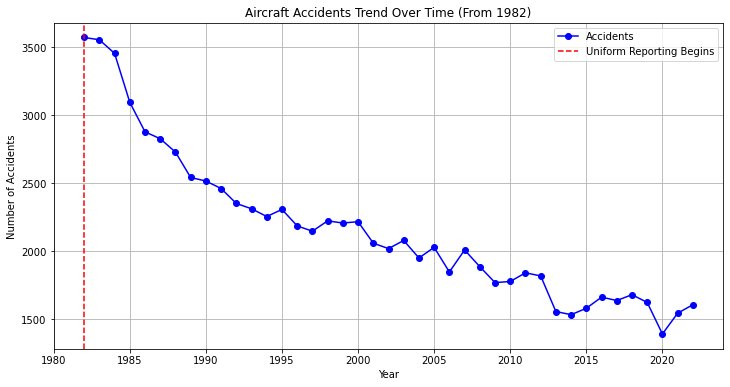

In [ ]:
filtered_df = Aviation_accidents_df[Aviation_accidents_df['Year'] >= 1982]# Filter data from 1982 onwards

accidents_per_year = filtered_df.groupby('Year').size()# Count accidents per year

# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year, marker='o', linestyle='-', color='b', label="Accidents")
plt.axvline(1982, color='r', linestyle='--', label="Uniform Reporting Begins") # draws a vertical line at a stated x-axis position.
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Accidents Trend Over Time (From 1982)")
plt.legend()
plt.grid()
plt.show()


As seen in the graph above there a donward trend in aircraft accidents meaning that over the years aviation safety is improving.The year 2020 showed the lowest number of aviation accidents mainly because of the travel restrictions enforced during the COVID-19 Pandemic.